<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<link href="https://content.fortune.com/wp-content/uploads/2020/02/favicon_144.ico" rel="shortcut icon"/>
<!-- @todo perhaps make GTM ID an env var instead of a setting, use here instead of hard-coding. -->
<!-- 3rd party dns-prefetching -->
<link crossorigin="" href="https://cdn.ampproject.org" rel="preconnect"/>
<link crossorigin="" href="https://buy.tinypass.com" rel="preconnect"/>
<link crossorigin="" href="https://static.adsafeprotected.com" rel="preconnect"/>
<link crossorigin="" href="https://content.fortune.com" rel="preconnect"/>
<link crossorigin="" href="https://download.fortune.com" rel="preconnect"/>
<link crossorigin="" href="https://fonts.googleapis.com" rel="preconnect"/>
<link crossorigin="" href="https://www.google-analytics.com" rel="preconnect"/>
<link crossorigin="" href="https://www.googletagmanager.com" rel="prec
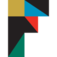
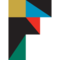
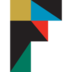
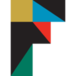
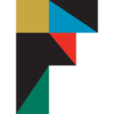
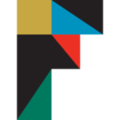
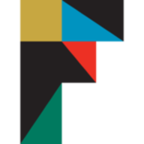
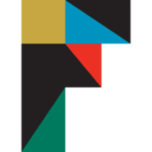
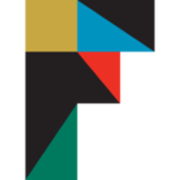
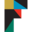

In [142]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
url="https://fortune.com/40-under-40/"
content=urlopen(url)
soup=BeautifulSoup(content,'html.parser')
print(soup)

In [143]:
a = str(soup.select("#preload")[0])
len(a)
b = a[66:(len(a)-15)]

In [144]:
import json
j = json.loads(b)

In [145]:
import pandas as pd

df = pd.DataFrame(columns=['name','link','sector'])
sector = ['Finance','Technology','Healthcare','Government and Politics','Media and Entertainment']

for m in range(0,5):
    for n in range(0,40):
        name = j['components']['page']['/40-under-40/'][5]['children'][1]['children'][m]['children'][n]['config']['title']
        link = j['components']['page']['/40-under-40/'][5]['children'][1]['children'][m]['children'][n]['config']['permalink']
        row = [name,link,sector[m]]
        df.loc[(30*m+n)] = row
        


In [146]:
df

,name,link,sector
0,Adam White,https://fortune.com/40-under-40/2020/adam-white/,Finance
1,Adelina Grozdanova,https://fortune.com/40-under-40/2020/adelina-g...,Finance
2,Adena Hefets,https://fortune.com/40-under-40/2020/adena-hef...,Finance
3,Akshay Naheta,https://fortune.com/40-under-40/2020/akshay-na...,Finance
4,Amy Hong,https://fortune.com/40-under-40/2020/amy-hong/,Finance
...,...,...,...
155,Stacy-Marie Ishmael,https://fortune.com/40-under-40/2020/stacy-mar...,Media and Entertainment
156,Taylor Lorenz,https://fortune.com/40-under-40/2020/taylor-lo...,Media and Entertainment
157,Telfar Clemens,https://fortune.com/40-under-40/2020/telfar-cl...,Media and Entertainment
158,Trevor Noah,https://fortune.com/40-under-40/2020/trevor-noah/,Media and Entertainment


In [152]:
for m in range(0,160):
    link = df.iloc[m,1]
    

In [170]:
link = df.iloc[0,1]

url=link
content=urlopen(url)
soup=BeautifulSoup(content,'html.parser')

In [173]:
a = str(soup.select("#preload")[0])
len(a)
b = a[66:(len(a)-15)]

In [174]:
import json
j = json.loads(b)

In [275]:
import pandas as pd

df2 = pd.DataFrame(columns=['age','title','company','about','twitter','ins'])

for m in range(0,160):
    
    name = df.iloc[m,0]
    link = df.iloc[m,1]
    
    url=link
    content=urlopen(url)
    soup=BeautifulSoup(content,'html.parser')
    
    a = str(soup.select("#preload")[0])
    len(a)
    b = a[66:(len(a)-15)]
    j = json.loads(b)
    
    age = j['components']['page'][url[19:1000]][5]['children'][1]['config']['stats'][0]['value']
    title = j['components']['page'][url[19:1000]][5]['children'][1]['config']['stats'][1]['value']
    company = j['components']['page'][url[19:1000]][5]['children'][1]['config']['stats'][2]['value']
    about = j['components']['page'][url[19:1000]][5]['children'][2]['children'][0]['children'][0]['config']['content'].strip()
    twitter = j['components']['page'][url[19:1000]][5]['children'][2]['children'][1]['config']['data'][0]['value']
    ins = j['components']['page'][url[19:1000]][5]['children'][2]['children'][1]['config']['data'][1]['value']
    row = [age,title,company,about,twitter,ins]
    df2.loc[m] = row


In [291]:
df3 = pd.concat([df,df2],axis=1)
df3.to_csv("/Users/arlenehuang/OneDrive - Columbia University/Internships/Silicon Valley Podcast/Fortune 40 under 40/40under40.csv", encoding = 'utf-8')